<img src="olympicrings.svg" width="200" height="2000" style="vertical-align:top">

# <center><font color='navy' size=6> Team Kellogg's Next Olympic Athlete</font></center>
<center><font size=3><i>By Marisol Hernandez</i></font></center>  
<center><font size=3><i>09/05/2020</i></font></center>

---

## <font color='navy'> Table of Contents</font>

[I. Objective](#objective)  
[II. Libraries](#libraries)  
[III. Data Exploration](#data-exploration)  
[IV. One column selection](#one-column-selection)  
[V. Series](#series)  
[VI. Plot](#plot)  
[VII. Summary](#summary)  
[VIII. Recommendations](#recommendations)

## <font color='navy'> Objective </font> <a id='objective'></a>
---

There are many reasons why companies establish athlete sponsorships: **increase sales, develop new markets, broaden customer base, launch new products etc.** Sponsoring an athlete can allow a company to benefit from their influence especially when their popularity is at its highest. An athlete sponsorship can be one way to appeal to a market of fans and if successful, can multiply a company's brand visibility.

There is a strong engagement with sports. Sports events are very popular worldwide with the Olympics being amongst the most watched global sports events. According to [Forbes](https://www.forbes.com/sites/christinasettimi/2016/08/05/the-2016-summer-olympics-in-rio-by-the-numbers/#12faa576fa18), the 2016 Rio Summer Olympics reached an estimated 5 billion worldwide audience. Selecting the right Olympic sport and athletes can bring tremendous results for a company.

The objective of this investigation is to select the right sport and athlete for Kellogg's to sponsor for the next Olympic Games. In doing so, I conducted my research based on the following criteria:  

**Criteria Used for Ranking:**  
**- Kellogg's Worldwide Market Share**  
**- The Upcoming Olympic Games (*Summer vs. Winter*)**  
**- Most Watched Sports Within the Targeted Market**  
**- Top Olympic Gold Medalists Within the Aforementioned Sport**

## <font color='navy'> Libraries </font>  <a id='libraries'></a>
---
The first step to every exploratory data analysis is to import all necessary libraries. The only library required for this project is `plyr`.

In [7]:
# install.packages('plyr')
library(plyr)

## <font color='navy'> Data Exploration </font>  <a id='data-exploration'></a>
---


Before making any recommendations, it is essential to assess the structure and summary of the data. To import and read the CSV file in R, I used the `read.csv(...)` function so that I could explore and analyze the data.

Because I don't know how much data I am working with, I used `head()` to print only the first six rows. From this, I can see that there are some *NULL* values, `<NA>`, under the `Medal` column. It is safe to conclude that these athletes didn't place at all. 

In [12]:
# Read CSV file and print first six rows
athletes <- read.csv(file = "athlete_events.csv")
head(athletes)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


Because I am only interested in athletes who earned a medal, I used the `!is.na()` function on the `Medal` column. Doing so drops all the athletes who did not earn a medal, i.e. athletes with `<NA>` under the `Medal` column. 

In [13]:
athletes <- athletes[!is.na(athletes$Medal),]

I still wanted to know how much data I was working with so I used `dim()` to check the dimensions of the data frame. In addition, I used `colnames()` to retrieve the column names. 

I now know that I am working with a _**39,783 by 15**_ dataframe. Just by glance, I already know that I won't need every single column for my investigation, but I will address this in a later section.

In [17]:
dim(athletes)
colnames(athletes)

[1] 39783    15

[1] "ID"     "Name"   "Sex"    "Age"    "Height" "Weight" "Team"   "NOC"   
 [9] "Games"  "Year"   "Season" "City"   "Sport"  "Event"  "Medal"

I was also curious about the type of variables I was working with so I used `str()` to check the variable types.

Here, I can see that this data frame contains data from 51 different Olympic games. I can also see a discrepancy between the levels of `Team` and the levels of `NOC`. It is safe to assume that there may be some input errors under `Team` so I will use `NOC` *(Name of Country)* to subset my data according to my country of interest.

According to [Kellogg's 2019 Annual Report](https://www.annualreports.com/HostedData/AnnualReports/PDF/NYSE_K_2019.pdf), the United States is Kellogg's largest market. I will direct my research on athletes that represented the _**United States**_ in the _**2016 Summer**_ Olympic Games who placed first, i.e. _**Gold**_ and subset my data accordingly in the following section.

In [5]:
str(athletes)

'data.frame':	39783 obs. of  15 variables:
 $ ID    : int  4 15 15 16 17 17 17 17 17 20 ...
 $ Name  : Factor w/ 134732 levels "  Gabrielle Marie \"Gabby\" Adcock (White-)",..: 29412 12394 12394 65571 97593 97593 97593 97593 97593 71092 ...
 $ Sex   : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age   : int  34 30 30 28 28 28 28 28 32 20 ...
 $ Height: int  NA NA NA 184 175 175 175 175 175 176 ...
 $ Weight: num  NA NA NA 85 64 64 64 64 64 85 ...
 $ Team  : Factor w/ 1184 levels "30. Februar",..: 278 350 350 350 350 350 350 350 350 742 ...
 $ NOC   : Factor w/ 230 levels "AFG","AHO","ALB",..: 56 69 69 69 69 69 69 69 69 151 ...
 $ Games : Factor w/ 51 levels "1896 Summer",..: 2 7 7 50 16 16 16 16 18 39 ...
 $ Year  : int  1900 1920 1920 2014 1948 1948 1948 1948 1952 1992 ...
 $ Season: Factor w/ 2 levels "Summer","Winter": 1 1 1 2 1 1 1 1 1 2 ...
 $ City  : Factor w/ 42 levels "Albertville",..: 27 3 3 35 18 18 18 18 14 1 ...
 $ Sport : Factor w/ 66 levels "Aeronautics",..: 62 

## <font color='navy'>One column selection </font> <a id='one-column-selection'></a>
---

I am interested in the top 10 _**Summer 2016**_ Olympic _**Gold**_ medalists from the _**United States**_. To retrieve this information, I created a function `medalist()` which transforms this notebook into an interactive environment. Running this function will deliver three prompts that ask for the *NOC*, *games*, and *medal*. These are stored in variables `country`, `games`, and `medal`. These variables are then used to subset the data frame `athletes` according to the country, games, and medal specified. 

Within the function, I also created an ordered data frame, `a`, with a count for each athlete. The last line of the function prints only the first 10 rows of `a`, which is the ten athletes with the most occurrences, i.e. the 10 athletes who earned the most `medal` medals.

Because I am interested in finding the top 10 Olympic gold medalists from the 2016 Summer Olympic Games for the United States, I input the required arguments. The beauty of this function is that users can change the arguments to their desired country, games, and medal to retrieve the top 10 Olympic medalists.

In [6]:
medalists <- function() {
    country <- readline(prompt = "Enter NOC: ")
    games <- readline(prompt = "Enter games: ")
    medal <- readline(prompt = "Enter medal: ")
    
    country.athletes <- athletes[athletes$NOC == country & athletes$Games == games & athletes$Medal == medal,]
    
    a <- count(country.athletes, "Name")
    a <- a[order(-a$freq),]
    print(head(a, n=10))
}

medalists()

Enter NOC: USA
Enter games: 2016 Summer
Enter medal: Gold
                                  Name freq
93             Michael Fred Phelps, II    5
62  Kathleen Genevieve "Katie" Ledecky    4
108               Simone Arianne Biles    4
104                        Ryan Murphy    3
4               Allyson Michelle Felix    2
8                    Anthony Lee Ervin    2
18                Caeleb Remel Dressel    2
80                          Lilly King    2
83         Madeline Jane "Maya" DiRado    2
97              Nathan Ghar-Jun Adrian    2


## <font color='navy'> Series </font> <a id='series'></a>
---

The only variables of value to my investigation are `Name`, `NOC`, `Games`, `Sport`, and `Medal` so I created a function `series()` that would subset the data frame `athletes` with data that pertained to those five variables and provide a summary for each of the five columns.

Just like the previous section, running this function will deliver three prompts that ask for the *NOC*, *games*, and *medal*. These are stored in variables `country`, `games`, and `medal`. These variables are then used to subset the data frame athletes according to the country, games, and medal specified.


This information is particularly helpful in finding the right sport and athlete Kellogg's should sponsor because we can see which sports and athletes earned the most medals of interest. We can also verify that we are looking at data for our country, games, and medal of interest.

In [7]:
series <- function() {
    country <- readline(prompt = "Enter NOC: ")
    games <- readline(prompt = "Enter games: ")
    medal <- readline(prompt = "Enter medal: ")
    
    country.athletes <- athletes[athletes$NOC == country & athletes$Games == games & athletes$Medal == medal,
                                c("Name", "NOC", "Games", "Sport", "Medal")]
    
    summary(country.athletes)  
}

series()

Enter NOC: USA
Enter games: 2016 Summer
Enter medal: Gold


                                 Name          NOC              Games    
 Michael Fred Phelps, II           :  5   USA    :139   2016 Summer:139  
 Kathleen Genevieve "Katie" Ledecky:  4   AFG    :  0   1896 Summer:  0  
 Simone Arianne Biles              :  4   AHO    :  0   1900 Summer:  0  
 Ryan Murphy                       :  3   ALB    :  0   1904 Summer:  0  
 Allyson Michelle Felix            :  2   ALG    :  0   1906 Summer:  0  
 Anthony Lee Ervin                 :  2   AND    :  0   1908 Summer:  0  
 (Other)                           :119   (Other):  0   (Other)    :  0  
        Sport       Medal    
 Swimming  :48   Bronze:  0  
 Athletics :27   Gold  :139  
 Basketball:24   Silver:  0  
 Water Polo:13               
 Rowing    : 9               
 Gymnastics: 8               
 (Other)   :10               

## <font color='navy'> Plot </font> <a id='plot'></a>
---

While the `series(country, games, medal)` function provides a numeric summary of the top Olympic medalists, visualizing the data can help deliver the bigger picture. To plot the data, I created a function `olympics()`. Running this function will deliver four prompts that ask for the *NOC*, *games*, *sport* and *medal*. These are stored in variables `country`, `games`, `sport` and `medal`. These variables are then used to subset the data frame athletes according to the country, games, sport and medal specified.

Within the function, I also created a data frame, `x`, with a count for each Olympic medalist to account for the number of `medal` medals they earned. Lastly, I used the `barplot()` function to plot my data from `x` so that I can visually identify the top Olympic medalists.

In [8]:
olympics <- function() {
    country <- readline(prompt = "Enter NOC: ")
    games <- readline(prompt = "Enter games: ")
    sport <- readline(prompt = "Enter sport: ")
    medal <- readline(prompt = "Enter medal: ")
    
    athletes <- athletes[athletes$NOC == country & athletes$Games == games & 
                         athletes$Sport == sport & athletes$Medal == medal,]
    
    x <- count(athletes, "Name")
    
    par(mar=c(5,18,3,1))
    barplot(height= x$freq, names.arg = x$Name, 
            main=paste("Olympic", medal, "Medalists\n in", sport), 
            xlab= paste(medal, "Medals Earned"), horiz=T, las=1, col='navy')
}

Just like with any marketing initiative, it is important to know our audience. The goal of this investigation is to reach Kellogg's largest market, the __*United States*__, so it would work to our own benefit to know what the most watched 2016 Summer Olympic sports were within the United States. According to [Forbes](#https://www.forbes.com/sites/maddieberg/2016/08/04/gymnastics-track-and-swimming-will-win-ratings-gold-in-rio/#6f36f9cc5f11), gymnastics, swimming, and athletics (track and field) _"have generally been the most-watched sports in the U.S. during the last few Olympic Games."_

With this information, we will create a plot for each of the top 3 most watched sports in the U.S., first being _**Gymnastics**_.

Enter NOC: USA
Enter games: 2016 Summer
Enter sport: Gymnastics
Enter medal: Gold


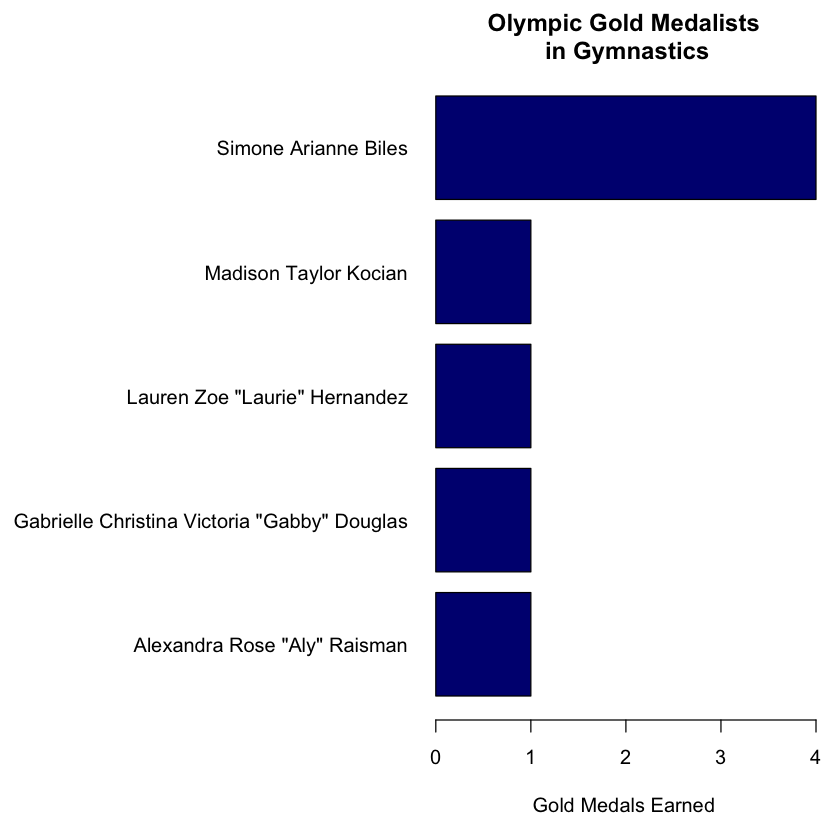

In [9]:
olympics()

In the plot above, we can see that Olympic gymnast Simone Arianne Biles took home the most gold medals for the United States. It would be no surprise if she was drowning in sponsors so I decided to play it safe and look for alternative options within the following 2 sports.

Once again, I ran the function to visualize the top Olympic gold medalists in *__Swimming__* for the United States.

Enter NOC: USA
Enter games: 2016 Summer
Enter sport: Swimming
Enter medal: Gold


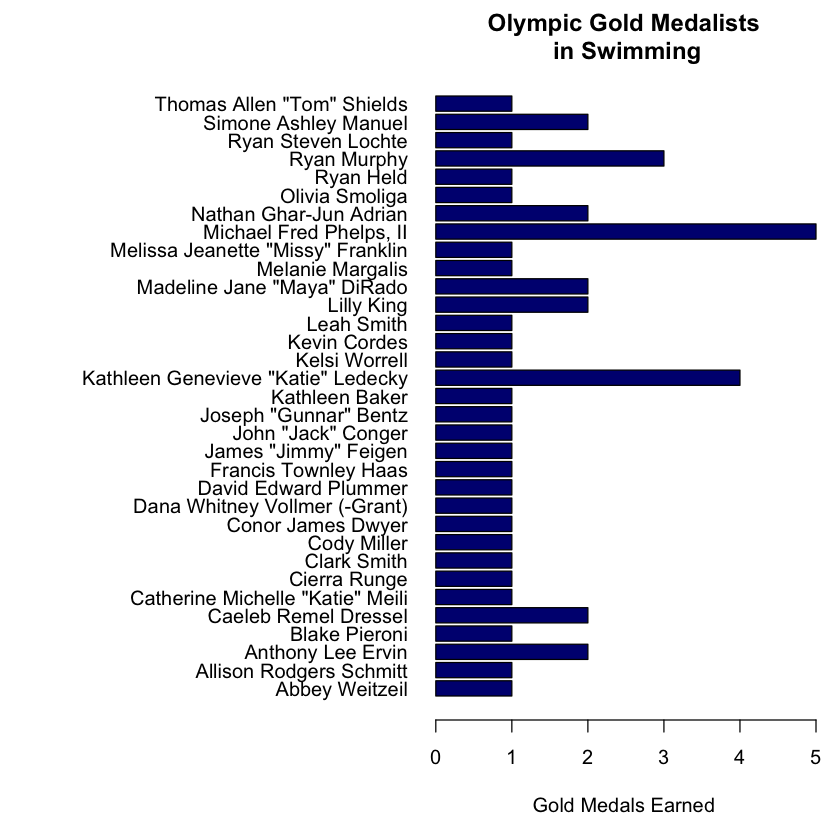

In [11]:
olympics()

In the plot above, we can see that Olympic swimmer Michael Fred Phelps, II took home the most gold medals for the United States. However, it is known that Michael Phelps retired in 2016. We might want to look at the next top Olympic swimmer medalists such as Kathleen Genevieve "Katie" Ledecky or Ryan Murphy as possible options.

Just for extra safety measures, I ran the function one last time to visualize the top Olympic gold medalists in ***Athletics***, the third most watched Olympic sport in the United States.

Enter NOC: USA
Enter games: 2016 Summer
Enter sport: Athletics
Enter medal: Gold


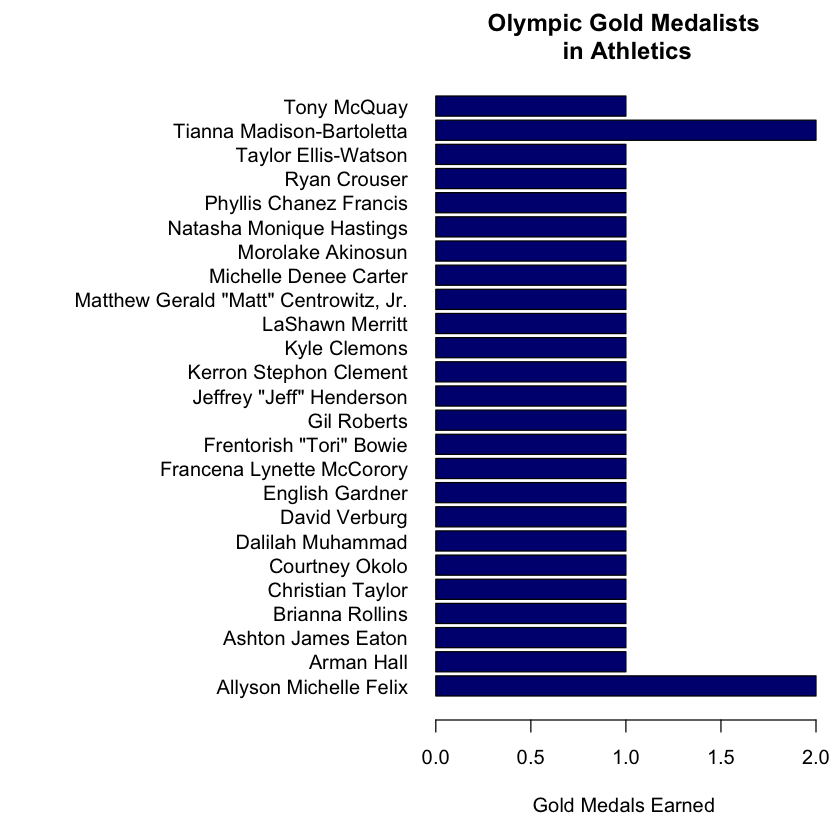

In [12]:
olympics()

In the plot above, we can see that Olympic runners Allyson Michelle Felix and Tianna Madison-Bartoletta took home the most gold medals for the United States, making them viable options.

## <font color='navy'> Summary </font> <a id='summary'></a>
---

In finding the right Olympic sport and athletes for Kellogg's to sponsor I had to narrow the focus of my study. First, I wanted to know Kellogg's largest market share because I wanted to choose an athlete that appealed to that particular market. I learned—unsurprisingly—that the ***United States*** is Kellogg's <ins>largest</ins> market, so I used `NOC` as my first criteria to subset my data frame accordingly. Secondly, I wanted to focus on athletes that pertained to the <ins>upcoming Olympic games</ins>, *2021 Summer*, so I used `Games` as my second criteria to subset my data frame with data that pertained to U.S. Olympic athletes who competed in ***2016 Summer***. 

Thirdly, I wanted to find the top three <ins>most-watched</ins> summer Olympic sports within my targeted market, *the U.S.*. I learned that the top three most-watched summer Olympic sports within the U.S. rank ***gymnastics, swimming, and athletics***, so I used `Sport` as my third criteria to subset my data frame accordingly. 
Lastly, I only cared for athletes who placed <ins>first</ins>, i.e. ***Gold***, because they are the athletes whose popularity is at its highest which could be used to multiply Kellogg's brand visibility. Therefore, I used `Medal` as my fourth and last criteria to subset my dataframe accordingly.


I created a general function `olympics()` that can take user input to subset and plot my data frame based on the aforementioned criteria. With this function, I can visualize the United States' top Olympic gold medalists for *gymnastics, swimming, and athletics*. Although I had specific criteria for my investigation, the beauty of my function `olympics()` is that Kellogg's executives can change the user input to their desired country, games, sport, and medal and retrieve the top Olympic medalists. This is particularly useful if Kellogg's decided to market to another country based on a different game, sport, or medal. For example, if Kellogg's chose to market to China then they might look for the top Gold medalists in Table Tennis, a very popular sport in China, all they would have to do is change their user input as shown below.

Enter NOC: CHN
Enter games: 2016 Summer
Enter sport: Table Tennis
Enter medal: Gold


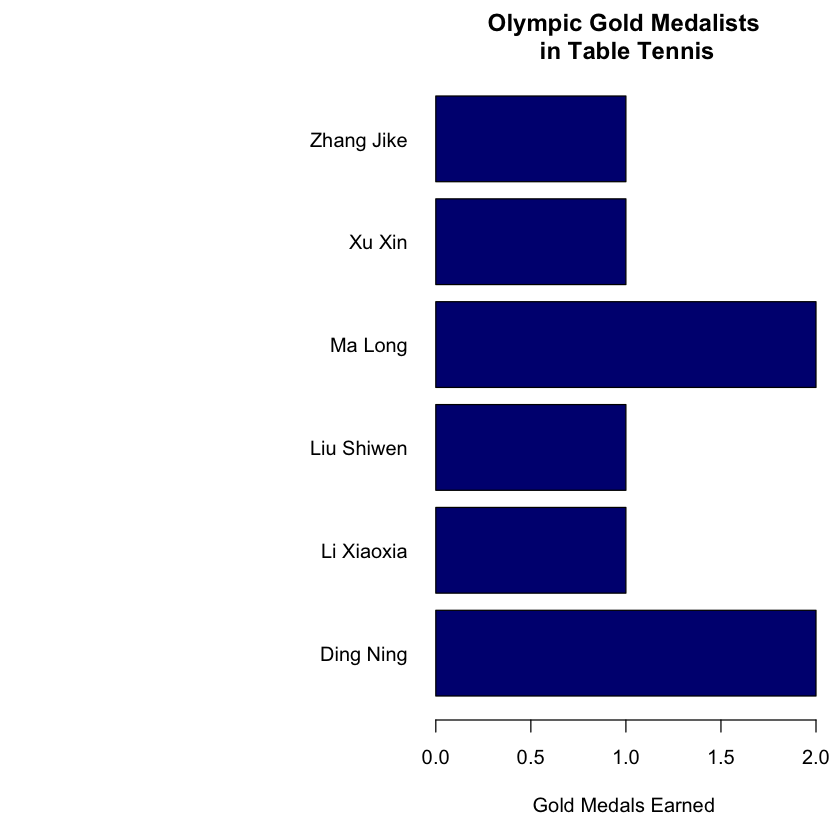

In [11]:
olympics()

## <font color='navy'> Recommendations </font> <a id='recommendations'></a>
---

Returning to our targeted market—the ***United States***—when choosing a sport or athlete to sponsor, Kellogg's must weigh in many factors before entering into a sports sponsorship agreement. In my investigation I weighed my recommendations based on the most watched Olympic sports with the athletes that won the most Gold medals in those sports coupled with the intangible marketability of those individuals.

Based on this criteria, I have provided a rank of recommendations.

| Top Recommendations                |
| ------------------                 |
| Simone Arianne Biles               |
| Kathleen Genevieve "Katie" Ledecky |
| Ryan Murphy                        |
| Allyson Michelle Felix             |
| Tianna Madison-Bartoletta          |

I wanted to provide a rank of recommendations for the case that my top choice may be unavailable. However, if I had to choose only one athlete, I would recommend **Simon Arianne Biles** because of her popularity, the popularity of her sport (gymnastics) amongst the U.S. audience, and her marketability.